In [4]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
import re
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

#metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


In [5]:
df = pd.read_excel("database.xlsx", sheet_name="task_1.csv") #read the xlsx file
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
train,test=train_test_split(df,test_size=0.2) #split the data in the training and test set


In [7]:
total = train.isnull().sum().sort_values(ascending=False)      # LOOK on the details of missing values
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
body,961,91.8
cabin,812,77.6
boat,656,62.7
home.dest,464,44.3
age,216,20.6


In [8]:
train.info()                   #print the full summary of training data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 738 to 792
Data columns (total 14 columns):
pclass       1047 non-null int64
survived     1047 non-null int64
name         1047 non-null object
sex          1047 non-null object
age          831 non-null float64
sibsp        1047 non-null int64
parch        1047 non-null int64
ticket       1047 non-null object
fare         1047 non-null float64
cabin        235 non-null object
embarked     1045 non-null object
boat         391 non-null object
body         86 non-null float64
home.dest    583 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 122.7+ KB


In [9]:
test.info()               #print the full summary of test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 338 to 213
Data columns (total 14 columns):
pclass       262 non-null int64
survived     262 non-null int64
name         262 non-null object
sex          262 non-null object
age          215 non-null float64
sibsp        262 non-null int64
parch        262 non-null int64
ticket       262 non-null object
fare         261 non-null float64
cabin        60 non-null object
embarked     262 non-null object
boat         95 non-null object
body         35 non-null float64
home.dest    162 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 30.7+ KB


In [10]:
train.head(5)     #display top 5 value of training data                    #

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
738,3,1,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.1000,NaN,S,12,NaN,"Bournemouth, England Newark, NJ"
1033,3,1,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,B,NaN,NaN
117,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN
1238,3,1,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S,13 15,NaN,NaN
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"


In [11]:
#  analysis the relationship Class vs survived 

print(train[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False))

   pclass  survived
0       1  0.645669
1       2  0.407583
2       3  0.264605


/anaconda3/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


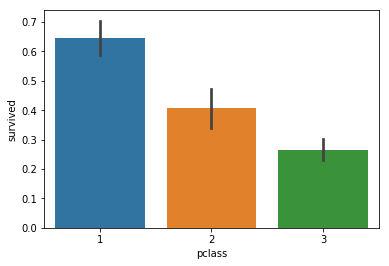

In [12]:
sns.barplot(x='pclass', y='survived', data=train) #analysis the relation between pclass and survived using graph


/anaconda3/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


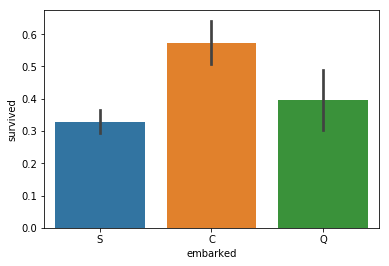

In [13]:
sns.barplot(x='embarked', y='survived', data=train) #analysis the relation between embarked and survived using graph


/anaconda3/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


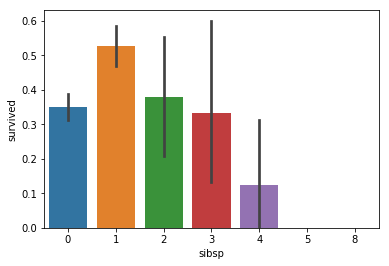

In [14]:
sns.barplot(x='sibsp', y='survived', data=train) #analysis the relation between sibsp and survived using graph


In [15]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}  #convert cabin number in Deck
data = [train, test]

for dataset in data:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['Deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [16]:
train = train.drop(['cabin'], axis=1) # Drop the Cabin feature 
test = test.drop(['cabin'], axis=1)

In [17]:
train.head(5)    # display top 5 value of training data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,Deck
738,3,1,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.1000,S,12,NaN,"Bournemouth, England Newark, NJ",8
1033,3,1,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,S,B,NaN,NaN,8
117,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,C,1,NaN,NaN,5
1238,3,1,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,S,13 15,NaN,NaN,8
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",2


In [18]:
train.describe()   #Basic statistical detail like percentaile,mean,std  


,pclass,survived,age,sibsp,parch,fare,body,Deck
count,1047.000000,1047.000000,831.000000,1047.000000,1047.000000,1047.000000,86.000000,1047.000000
mean,2.313276,0.385864,29.979342,0.483286,0.369628,32.222644,153.627907,6.939828
std,0.837257,0.487031,14.135644,1.022434,0.859073,50.366633,101.478256,2.086378
min,1.000000,0.000000,0.333300,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,61.250000,8.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,13.500000,139.000000,8.000000
75%,3.000000,1.000000,38.750000,1.000000,0.000000,30.035400,255.750000,8.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,8.000000


In [19]:
top = 'S'                           #embarked has one position left so replace with S because it is not fequent 
data = [train, test]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna(top)

In [20]:
data = [train, test]                   #fare has float datatype so it is converted into integer

for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [21]:
genders = {"male": 0, "female": 1}      #map the value of male and female with 0 and 1
data = [train, test]

for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

In [22]:
train['ticket'].describe()    #Basic statistical detail like percentaile,mean,std  of ticket

count         1047
unique         787
top       CA. 2343
freq             9
Name: ticket, dtype: object

In [23]:
train = train.drop(['ticket'], axis=1)      #drop the value of ticket from training and test 
test = test.drop(['ticket'], axis=1)

In [24]:
train['age'] = train['age'].fillna(train['age'].median()) # handle the missing value in age attribute
test['age'] = test['age'].fillna(test['age'].median()) # handle the missing value in age attribute


In [25]:
ports = {"S": 0, "C": 1, "Q": 2}         #map the value of embarked with there corresponding value interger 
data = [train, test]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [26]:
data = [train, test]                    #use name to extract titile of the name so can built new feature
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['name'], axis=1)
test = test.drop(['name'], axis=1)

In [27]:
train = train.drop(['home.dest'], axis=1)     #drop home.dest from training and test data
test = test.drop(['home.dest'], axis=1)

In [28]:
train = train.drop(['boat'], axis=1)          #drop boat from training and test data
test = test.drop(['boat'], axis=1)

In [29]:
train = train.drop(['body'], axis=1)         #drop body from training and test data
test = test.drop(['body'], axis=1)

In [30]:
train.head(10)                              #Display top 10 value of training data


,pclass,survived,sex,age,sibsp,parch,fare,embarked,Deck,Title
738,3,1,1,17.0,0,1,16,0,8,2
1033,3,1,0,28.0,0,0,7,0,8,1
117,1,1,1,30.0,0,0,56,1,5,2
1238,3,1,0,25.0,0,0,7,0,8,1
49,1,1,0,36.0,0,1,512,1,2,1
40,1,0,0,28.0,0,0,39,1,8,5
1119,3,0,0,22.0,0,0,7,0,8,1
212,1,0,0,37.0,0,1,29,1,3,1
227,1,1,1,22.0,1,0,66,0,3,3
473,2,0,0,28.0,0,0,0,0,8,1


In [31]:
data = [train, test]                             # scaling the value of fare from 0 to 5

for dataset in data:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare']   = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare']   = 4
    dataset.loc[ dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [32]:
train.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Deck,Title
738,3,1,1,17.0,0,1,2,0,8,2
1033,3,1,0,28.0,0,0,0,0,8,1
117,1,1,1,30.0,0,0,3,1,5,2
1238,3,1,0,25.0,0,0,0,0,8,1
49,1,1,0,36.0,0,1,5,1,2,1
40,1,0,0,28.0,0,0,3,1,8,5
1119,3,0,0,22.0,0,0,0,0,8,1
212,1,0,0,37.0,0,1,2,1,3,1
227,1,1,1,22.0,1,0,3,0,3,3
473,2,0,0,28.0,0,0,0,0,8,1


In [33]:
data = [train, test]                              #adding the new column age_class
for dataset in data:
    dataset['Age_Class']= dataset['age']* dataset['pclass']

In [34]:
X_train = train.drop("survived", axis=1)         # divided the data X_train and Y_train and drop the survived from X_train
Y_train = train["survived"]
X_test = test.drop(test.columns[[0]], axis=1) 

In [35]:
random_forest = RandomForestClassifier(n_estimators=100)     # applying random forest algorithm
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [36]:
logreg = LogisticRegression()                             #applying Logistic Regression
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)             #applying KNN algorithm
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [38]:
linear_svc = LinearSVC()                             #applying SVM algorithm
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [39]:
decision_tree = DecisionTreeClassifier()            #applying Decision Tree algorithm
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [40]:
results = pd.DataFrame({                                        # calculating the Best model
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,  acc_random_forest,acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
94.75,Decision Tree
94.65,Random Forest
83.48,KNN
79.47,Logistic Regression
74.21,Support Vector Machines


In [41]:
rf = LogisticRegression()                          # applying 10 cross validation score on LR
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83962264 0.82075472 0.79245283 0.8        0.76923077 0.77884615
 0.76923077 0.80769231 0.77884615 0.77884615]
Mean: 0.7935522496371554
Standard Deviation: 0.022219485289026276


In [42]:
logistic = LogisticRegression()                     #training Logistic again
logistic.fit(X_train, Y_train)  
Y_prediction = logistic.predict(X_test)

logistic.score(X_train, Y_train)

acc_log = round(logistic.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

79.47 %


In [43]:
predictions = cross_val_predict(logistic, X_train, Y_train, cv=3) #calculating the confusion matrix
confusion_matrix(Y_train, predictions)

array([[542, 101],
       [117, 287]])

In [44]:
print("Precision:", precision_score(Y_train, predictions))    #calculating the Precision and recall
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7396907216494846
Recall: 0.7103960396039604


In [45]:
print("logistic regression")
f1_score(Y_train, predictions)                             # calculating the f1_score

logistic regression


0.7247474747474747

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)                      # applying 10 cross validation score on KNN
scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77358491 0.70754717 0.75471698 0.7047619  0.72115385 0.71153846
 0.75       0.74038462 0.78846154 0.75961538]
Mean: 0.7411764807519525
Standard Deviation: 0.027612085279056238


In [47]:
knn = KNeighborsClassifier(n_neighbors = 3)                     #training KNN again
knn.fit(X_train, Y_train)
Y_prediction =knn.predict(X_test)

knn.score(X_train, Y_train)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

83.48 %


In [48]:
predictions = cross_val_predict(knn, X_train, Y_train, cv=3)  #calculating the confusion matrix
confusion_matrix(Y_train, predictions)

array([[518, 125],
       [154, 250]])

In [49]:
print("Precision KNN:", precision_score(Y_train, predictions))    #calculating the Precision and recall
print("Recall  KNN:",recall_score(Y_train, predictions))

Precision KNN: 0.6666666666666666
Recall  KNN: 0.6188118811881188


In [50]:
print("KNN f1 score")
f1_score(Y_train, predictions)              # calculating the f1_score

KNN f1 score


0.6418485237483954

In [51]:
rf = RandomForestClassifier(n_estimators=100)               # # applying 10 cross validation score on random forest 
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81132075 0.80188679 0.83962264 0.81904762 0.81730769 0.78846154
 0.74038462 0.84615385 0.80769231 0.80769231]
Mean: 0.8079570115419171
Standard Deviation: 0.02768853870918457


In [52]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)                        #training random forest again
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

94.75 %


In [53]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)   #confusion matrix of random forest
confusion_matrix(Y_train, predictions)

array([[549,  94],
       [116, 288]])

In [54]:
print("Precision random forest:", precision_score(Y_train, predictions))    #calculating the Precision and recall
print("Recall  random forest:",recall_score(Y_train, predictions))

Precision random forest: 0.7539267015706806
Recall  random forest: 0.7128712871287128


In [55]:
print("random forest")                                      #F1 score of random forest
f1_score(Y_train, predictions)

random forest


0.732824427480916

In [56]:
decision_tree = DecisionTreeClassifier()                #10 cross validation on decision tree
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79245283 0.77358491 0.81132075 0.81904762 0.78846154 0.76923077
 0.73076923 0.84615385 0.82692308 0.80769231]
Mean: 0.7965636878844425
Standard Deviation: 0.03148743892227945


In [57]:
decision_tree = DecisionTreeClassifier()            #training Decision Tree algorithm again
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [58]:
print("Precision Decision tree:", precision_score(Y_train, predictions))    #calculating the Precision and recall
print("Recall  Decision Tree:",recall_score(Y_train, predictions))

Precision Decision tree: 0.7539267015706806
Recall  Decision Tree: 0.7128712871287128


In [59]:
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)   #confusion matrix of Decision tree
confusion_matrix(Y_train, predictions)

array([[527, 116],
       [125, 279]])

In [60]:
print("decision tree")                               #Decision tree F1 score
f1_score(Y_train, predictions)

decision tree


0.6983729662077597

In [61]:
linear_svc = LinearSVC()                             # appying 10 cross val on SVM
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81132075 0.81132075 0.83018868 0.81904762 0.79807692 0.77884615
 0.72115385 0.83653846 0.80769231 0.81730769]
Mean: 0.803149319234225
Standard Deviation: 0.031293755598879244


In [62]:
linear_svc = LinearSVC()                             #Training again SVM algorithm
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [63]:
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)   #confusion matrix of SVM
confusion_matrix(Y_train, predictions)

array([[525, 118],
       [120, 284]])

In [64]:
print("Precision SVM:", precision_score(Y_train, predictions))    #calculating the Precision and recall
print("Recall SVM:",recall_score(Y_train, predictions))

Precision SVM: 0.7064676616915423
Recall SVM: 0.7029702970297029


In [65]:
print("SVM")                               #SVM F1 score
f1_score(Y_train, predictions)

SVM


0.7047146401985113